-- **Goal: predict the next 10 pi digits**

*Conclusion:* <br>
This project didn't get a good result, the models didn't get good metric values. <br>
The reason of it was not working well is because I tried to predict the next digit on the actual digit. But reflecting about that, there is no correlation between the actual digit and next one (see the heatmap in the end). Also, the *target variable is not continuous*, then it's not about a regression problem. <br>
I was thinking that I could solve this problem like netflix_stock_price, however it's not the same case. On netflix_stock_price (as well as dolar_price) there is a correlation between the current price of the stock exchange and the price in the future, and in that case the target variable was continuous.

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
import pandas as pd

# Loading the data

In [2]:
#url = "https://introcs.cs.princeton.edu/java/data/pi-10million.txt"
#pi = np.loadtxt(url)

In [3]:
with open("dataset/PI_1K_DP.TXT") as f:
    content = f.read()

In [4]:
content

'141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145263560827785771342757789609173637178721468440901224953430146549585371050792279689258923542019956112129021960864034418159813629774771309960518707211349999998372978049951059731732816096318595024459455346908302642522308253344685035261931188171010003137838752886587533208381420617177669147303598253490428755468731159562863882353787593751957781857780532171226806613001927876611195909216420198

# Cleaning the data

In [5]:
# conveting to list and removing [:-1] the last character ('\n')
pi_digits_list = [int(i) for i in list(content)[:-1]]

# converting to np.array
pi_digits = np.array(pi_digits_list)

In [6]:
pi_digits

array([1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 7, 9, 3, 2, 3, 8, 4, 6, 2, 6,
       4, 3, 3, 8, 3, 2, 7, 9, 5, 0, 2, 8, 8, 4, 1, 9, 7, 1, 6, 9, 3, 9,
       9, 3, 7, 5, 1, 0, 5, 8, 2, 0, 9, 7, 4, 9, 4, 4, 5, 9, 2, 3, 0, 7,
       8, 1, 6, 4, 0, 6, 2, 8, 6, 2, 0, 8, 9, 9, 8, 6, 2, 8, 0, 3, 4, 8,
       2, 5, 3, 4, 2, 1, 1, 7, 0, 6, 7, 9, 8, 2, 1, 4, 8, 0, 8, 6, 5, 1,
       3, 2, 8, 2, 3, 0, 6, 6, 4, 7, 0, 9, 3, 8, 4, 4, 6, 0, 9, 5, 5, 0,
       5, 8, 2, 2, 3, 1, 7, 2, 5, 3, 5, 9, 4, 0, 8, 1, 2, 8, 4, 8, 1, 1,
       1, 7, 4, 5, 0, 2, 8, 4, 1, 0, 2, 7, 0, 1, 9, 3, 8, 5, 2, 1, 1, 0,
       5, 5, 5, 9, 6, 4, 4, 6, 2, 2, 9, 4, 8, 9, 5, 4, 9, 3, 0, 3, 8, 1,
       9, 6, 4, 4, 2, 8, 8, 1, 0, 9, 7, 5, 6, 6, 5, 9, 3, 3, 4, 4, 6, 1,
       2, 8, 4, 7, 5, 6, 4, 8, 2, 3, 3, 7, 8, 6, 7, 8, 3, 1, 6, 5, 2, 7,
       1, 2, 0, 1, 9, 0, 9, 1, 4, 5, 6, 4, 8, 5, 6, 6, 9, 2, 3, 4, 6, 0,
       3, 4, 8, 6, 1, 0, 4, 5, 4, 3, 2, 6, 6, 4, 8, 2, 1, 3, 3, 9, 3, 6,
       0, 7, 2, 6, 0, 2, 4, 9, 1, 4, 1, 2, 7, 3, 7,

# Exploratory data analysis

In [7]:
len(pi_digits)

1000

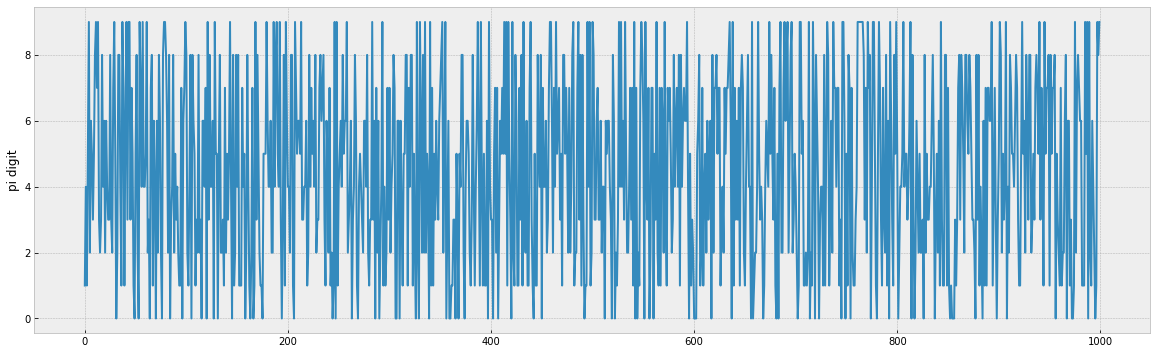

In [8]:
plt.figure(figsize=(20,6))

plt.ylabel("pi digit")

plt.plot(pi_digits)
plt.show()

# Feature engineering

**Creating the feature that will help to predict the next 10 digits** <br>
The algorithm will create the relation between the current digit and the digit comes 10 position after.

In [9]:
pi_df = pd.DataFrame(pi_digits, columns=['digit'])
pi_df.head()

,digit
0,1
1,4
2,1
3,5
4,9


In [10]:
# shift 10 because we want to predict the 10 next
pi_df[['predict']] = pi_df[['digit']].shift(-10)

In [11]:
pi_df.head()

,digit,predict
0,1,8.0
1,4,9.0
2,1,7.0
3,5,9.0
4,9,3.0


In [12]:
pi_df.tail()

,digit,predict
995,0,NaN
996,1,NaN
997,9,NaN
998,8,NaN
999,9,NaN


**Creating the variables x (example data), y (target) and next_10 (want to predict)**

In [13]:
x = np.array(pi_df[['digit']][:-10])
print(x[:10])

[[1]
 [4]
 [1]
 [5]
 [9]
 [2]
 [6]
 [5]
 [3]
 [5]]


In [14]:
y = np.array(pi_df[['predict']][:-10].astype(int))
print(y[:10])

[[8]
 [9]
 [7]
 [9]
 [3]
 [2]
 [3]
 [8]
 [4]
 [6]]


In [15]:
# getting there I have the prediction because I will plot them in a graph comparing with real value
next_10 = np.array(pi_df[['digit']][:-10].tail(10))
next_10

array([[6],
       [6],
       [1],
       [1],
       [1],
       [9],
       [5],
       [9],
       [0],
       [9]])

# Modeling

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

## using train_test_split 

<br>
75% train - 25% test

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

**creating models**

In [18]:
dt = DecisionTreeRegressor()
dt = dt.fit(x_train, y_train)

In [19]:
lr = LinearRegression()
lr = lr.fit(x_train, y_train)

**Evaluate algorithms** <br>
no good impressions :/ <br>
here we can see that the models didn't got a good metric value. --> reflection of the why in conclusion section.

*DecisionTreeRegressor*

In [22]:
y_prediction_dt = dt.predict(x_test)
print(y_prediction_dt[:10])
print()
print(y_test[:10])

[4.975      4.5942029  4.4        4.81428571 4.1971831  4.08139535
 4.81428571 4.84285714 4.95945946 4.95945946]

[[7]
 [1]
 [7]
 [5]
 [0]
 [8]
 [4]
 [2]
 [5]
 [8]]


In [23]:
dt.score(x_test, y_test)

-0.03558953457825087

In [24]:
mean_squared_error(y_test, y_prediction_dt)

8.034372474595092

*LinearRegression*

In [25]:
y_prediction_lr = lr.predict(x_test)
print(y_prediction_lr[:10])
print()
print(y_test[:10])

[[4.65439805]
 [4.48261117]
 [4.39671773]
 [4.61145133]
 [4.56850461]
 [4.35377101]
 [4.61145133]
 [4.52555789]
 [4.43966445]
 [4.43966445]]

[[7]
 [1]
 [7]
 [5]
 [0]
 [8]
 [4]
 [2]
 [5]
 [8]]


In [26]:
lr.score(x_test, y_test)

-0.01499241106833682

In [27]:
mean_squared_error(y_test, y_prediction_lr)

7.874574642868948

*prediction next_10*

In [28]:
tree_prediction = dt.predict(next_10)
print(tree_prediction)
print()

linear_prediction = lr.predict(next_10)
print(linear_prediction)

[4.1971831  4.1971831  4.08139535 4.08139535 4.08139535 4.13333333
 4.84285714 4.13333333 4.08333333 4.13333333]

[[4.56850461]
 [4.56850461]
 [4.35377101]
 [4.35377101]
 [4.35377101]
 [4.69734477]
 [4.52555789]
 [4.69734477]
 [4.31082429]
 [4.69734477]]


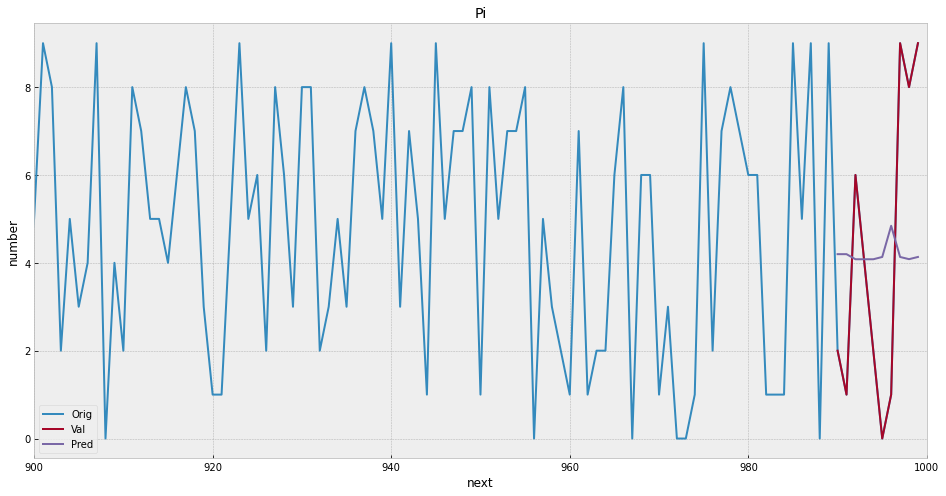

In [29]:
predictions = tree_prediction

valid = pi_df[x.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Pi')
plt.xlabel('next')
plt.ylabel('number')

plt.plot(pi_df['digit'])
plt.plot(valid[['digit', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.xlim(900, 1000)
plt.show()

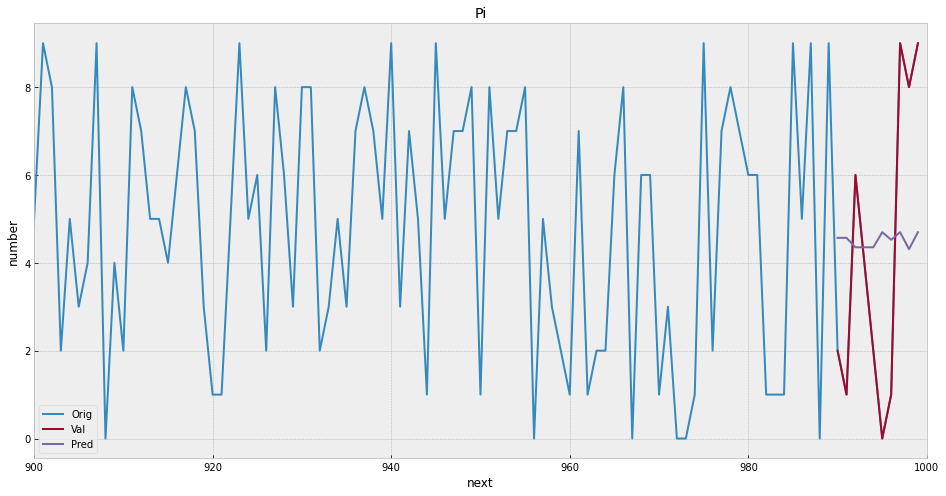

In [30]:
predictions = linear_prediction

valid = pi_df[x.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Pi')
plt.xlabel('next')
plt.ylabel('number')

plt.plot(pi_df['digit'])
plt.plot(valid[['digit', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.xlim(900, 1000)
plt.show()

# Conclusion:

It's not possible to predict the next pi digit based on the last one. It happens because there is no correlation between the digits (like the dolar value today has a correlation with the dolar value yesterday). <br>
Pi digits aren't not related to each other and we can see it thought the graph line in exploratory analysis. And, mainly, it's possible to see that through the heatmap below.

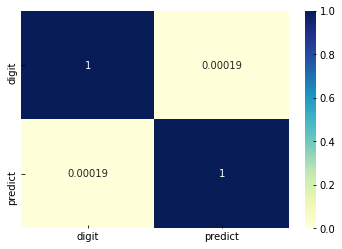

In [31]:
import seaborn as sns

sns.heatmap(pi_df[:-10].corr(), cmap="YlGnBu", annot=True, vmax=1, vmin=0)